In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
dataset_Train = pd.read_csv("Train.csv")
dataset_Test = pd.read_csv("Test.csv")
dataset_Test_OG = pd.read_csv("Test.csv")
var = pd.read_csv("VariableDefinitions.csv")

In [ ]:
pd.options.display.max_colwidth = 200 #Changing parameters to be able to display long sentences

In [ ]:
var

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,"The interviewee’s relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know"
9,marital_status,"The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don’t know"


In [ ]:
dataset_Train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Text(0, 0.5, 'number of people')

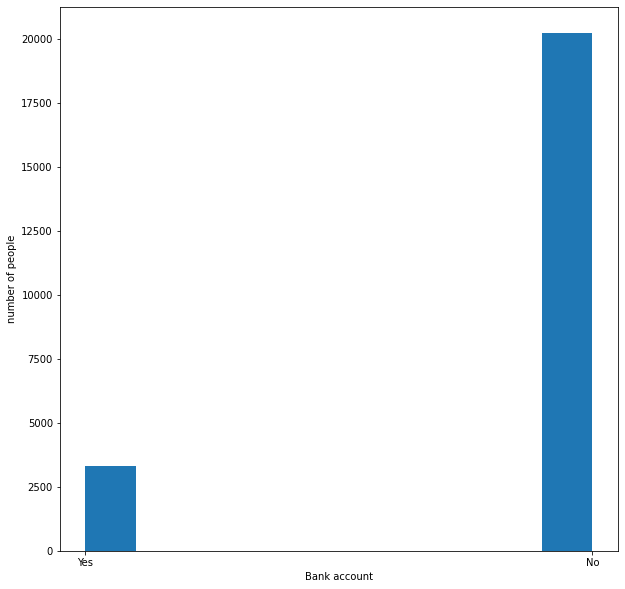

In [ ]:
  figure(num=None, figsize=(10, 10))
  plt.hist(dataset_Train['bank_account'])
  plt.xlabel('Bank account')
  plt.ylabel('number of people')

In [ ]:
yes = dataset_Train[dataset_Train['bank_account']=='Yes']['country'].value_counts() #counts the number of people with bank accounts in each country
no  = dataset_Train[dataset_Train['bank_account']== 'No']['country'].value_counts() #counts the number of people with no bank accounts in each country

In [ ]:
yes

Kenya       1521
Rwanda      1003
Tanzania     607
Uganda       181
Name: country, dtype: int64

In [ ]:
no

Rwanda      7732
Tanzania    6013
Kenya       4547
Uganda      1920
Name: country, dtype: int64

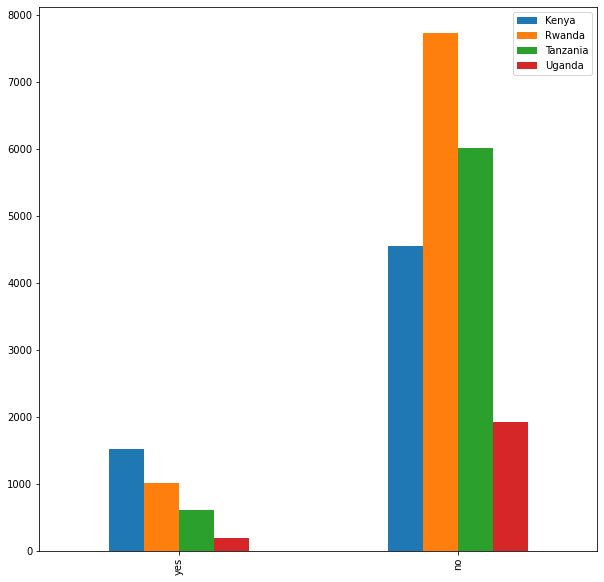

In [ ]:
country = pd.DataFrame([yes , no])
country.index = ['yes', 'no']
country.plot(kind = 'bar' , figsize = (10,10))

In [ ]:
yes_job = dataset_Train[dataset_Train['bank_account']=='Yes']['job_type'].value_counts() 
no_job= dataset_Train[dataset_Train['bank_account']== 'No']['job_type'].value_counts()

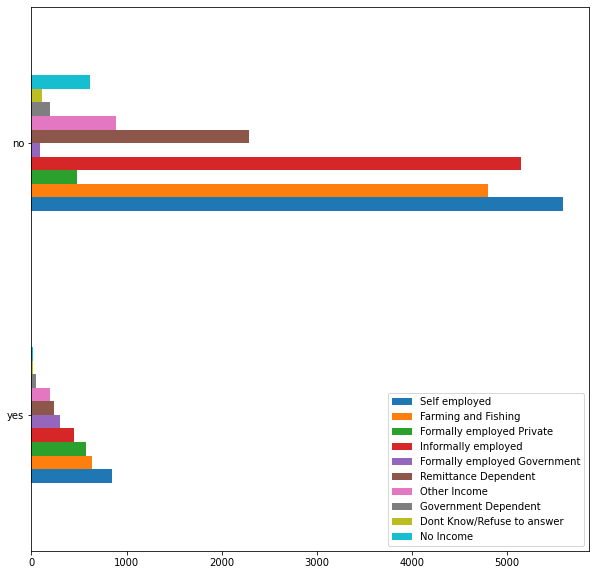

In [ ]:
age = pd.DataFrame([yes_job, no_job])
age.index = ['yes', 'no']
age.plot(kind = 'barh', figsize = (10,10))

In [ ]:
yes_gender = dataset_Train[dataset_Train['bank_account']=='Yes']['gender_of_respondent'].value_counts() 
no_gender= dataset_Train[dataset_Train['bank_account']== 'No']['gender_of_respondent'].value_counts()

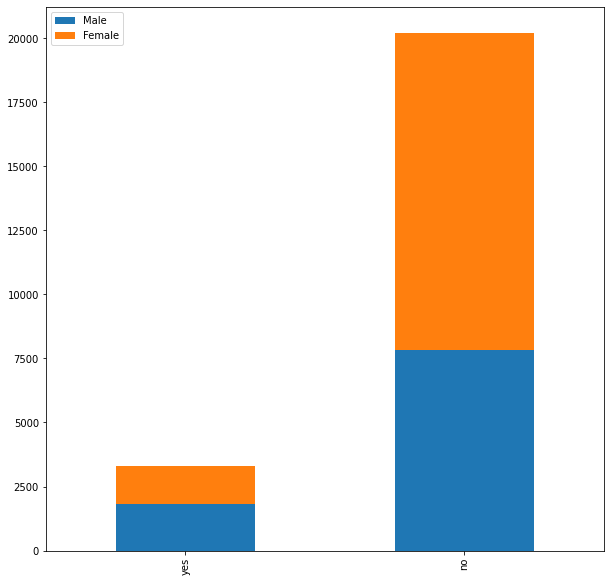

In [ ]:
age = pd.DataFrame([yes_gender, no_gender])
age.index = ['yes', 'no']
age.plot(kind = 'bar', stacked = True, figsize = (10,10))

In [ ]:
dataset_Train.isna().sum() #Checking for missing values

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [ ]:
dataset_Train.max() #displays the max of every column

country                                            Uganda
year                                                 2018
uniqueid                                     uniqueid_999
bank_account                                          Yes
location_type                                       Urban
cellphone_access                                      Yes
household_size                                         21
age_of_respondent                                     100
gender_of_respondent                                 Male
relationship_with_head                             Spouse
marital_status                                    Widowed
education_level           Vocational/Specialised training
job_type                                    Self employed
dtype: object

In [ ]:
dataset_Train['age_of_respondent'] = dataset_Train['age_of_respondent']/100
dataset_Train['household_size'] = dataset_Train['household_size']/21
dataset_Test['age_of_respondent'] = dataset_Test['age_of_respondent']/100
dataset_Test['household_size'] = dataset_Test['household_size']/21

Encoding dummy variables
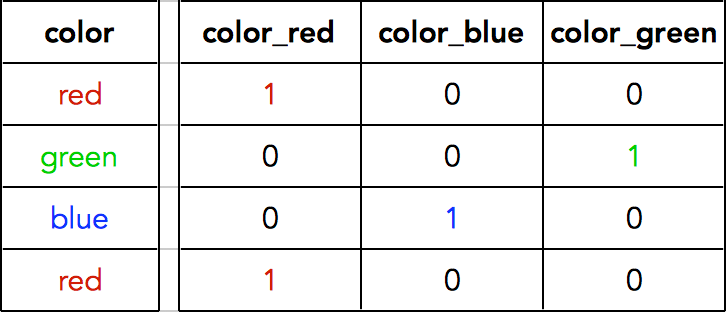

In [ ]:
dummies = ['location_type', 'education_level','relationship_with_head','gender_of_respondent','cellphone_access','cellphone_access','job_type','marital_status','country','year']


In [ ]:
dataset_Train_dummied = pd.get_dummies(dataset_Train, columns=dummies)
dataset_Test_dummied = pd.get_dummies(dataset_Test, columns=dummies)

In [ ]:
dataset_Train_dummied['bank_account'] = dataset_Train_dummied['bank_account'].map( {'Yes': 1, 'No': 0} ).astype(int) 

In [ ]:
dataset_Train_dummied = dataset_Train_dummied.drop('uniqueid', axis=1)
dataset_Test_dummied = dataset_Test_dummied.drop('uniqueid', axis=1)

In [ ]:
dataset_Train_dummied.head()

,bank_account,household_size,age_of_respondent,location_type_Rural,location_type_Urban,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,gender_of_respondent_Female,gender_of_respondent_Male,cellphone_access_No,cellphone_access_Yes,cellphone_access_No,cellphone_access_Yes,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,year_2016,year_2017,year_2018
0,1,0.142857,0.24,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
1,0,0.238095,0.70,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
2,1,0.238095,0.26,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
3,0,0.238095,0.34,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
4,0,0.380952,0.26,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1


In [ ]:
dataset_Test_dummied.head()

,household_size,age_of_respondent,location_type_Rural,location_type_Urban,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,gender_of_respondent_Female,gender_of_respondent_Male,cellphone_access_No,cellphone_access_Yes,cellphone_access_No,cellphone_access_Yes,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,year_2016,year_2017,year_2018
0,0.142857,0.30,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1,0.333333,0.51,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
2,0.142857,0.77,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
3,0.285714,0.39,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
4,0.142857,0.16,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1


In [ ]:
X= dataset_Train_dummied.drop('bank_account', axis=1)
y= dataset_Train_dummied ['bank_account']

In [ ]:
X.head()

,household_size,age_of_respondent,location_type_Rural,location_type_Urban,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,gender_of_respondent_Female,gender_of_respondent_Male,cellphone_access_No,cellphone_access_Yes,cellphone_access_No,cellphone_access_Yes,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,year_2016,year_2017,year_2018
0,0.142857,0.24,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
1,0.238095,0.70,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
2,0.238095,0.26,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
3,0.238095,0.34,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
4,0.380952,0.26,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1


In [ ]:
y

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [ ]:
# Data Preprocessing 
x= dataset_Train_dummied.drop('bank_account', axis=1)
y= dataset_Train_dummied ['bank_account']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

Decision Tree

In [ ]:
# training DTR model
dtr = DecisionTreeClassifier()  
dtr_model = dtr.fit(x_train, y_train)

In [ ]:
#prediction
y_pred_dtr = dtr_model.predict(x_test) 
y_pred_dtr

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Evaluate the model
print(classification_report(y_test, y_pred_dtr.round()))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4074
           1       0.37      0.36      0.37       631

    accuracy                           0.83      4705
   macro avg       0.64      0.63      0.64      4705
weighted avg       0.83      0.83      0.83      4705



In [ ]:
def randomstatesearch (clf) :
 d_scores = []
 for i in range(1,15) : 
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
  clf = clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  d_scores.append(accuracy)
 print ( d_scores)

In [ ]:
randomstatesearch(dtr)

[0.8382571732199787, 0.8422954303931988, 0.8371944739638683, 0.8335812964930924, 0.8410201912858661, 0.8350690754516472, 0.844845908607864, 0.8418703506907546, 0.8335812964930924, 0.8329436769394262, 0.8323060573857598, 0.8391073326248671, 0.8335812964930924, 0.836769394261424]


Random Forest Model

In [ ]:
#training RFR model
rfr = RandomForestClassifier()  
rfr_model = rfr.fit(x_train, y_train) 

In [ ]:
#prediction
y_pred_rfr = rfr_model.predict(x_test) 
y_pred_rfr.round()

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#evaluate the model
print(classification_report(y_test, y_pred_rfr.round()))


              precision    recall  f1-score   support

           0       0.91      0.94      0.92      4074
           1       0.48      0.37      0.42       631

    accuracy                           0.86      4705
   macro avg       0.69      0.66      0.67      4705
weighted avg       0.85      0.86      0.85      4705



Support Vector Machine

In [ ]:
# Training the algorithm
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# predecting 
y_pred_svm = svclassifier.predict(x_test)
print(y_pred_svm)

[0 0 0 ... 0 0 0]


In [ ]:
# evaluation model 
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      4074
           1       0.59      0.26      0.36       631

    accuracy                           0.88      4705
   macro avg       0.74      0.62      0.65      4705
weighted avg       0.85      0.88      0.86      4705



KNN

In [ ]:
#chossing KNN value
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

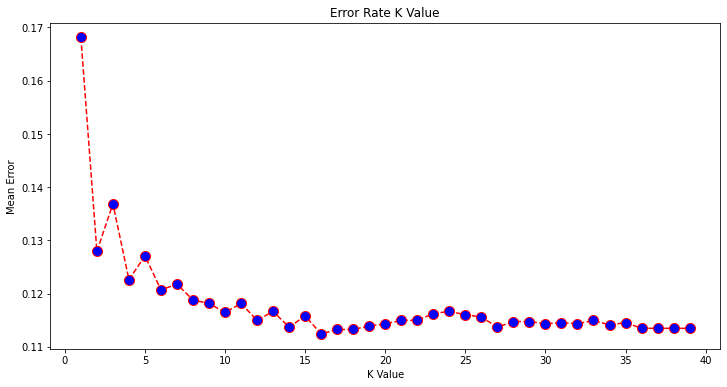

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
#training the algorithm
#Fitting your model (using fit() method) to the training data is essentially the training part of the modelling process
classifier_knn = KNeighborsClassifier(n_neighbors=16)
classifier_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [ ]:
#prediction
y_pred_KNN = classifier_knn.predict(x_test)
print (y_pred_KNN)


[0 0 0 ... 0 0 0]


4705

In [ ]:
#evalutate 
print(classification_report(y_test, y_pred_KNN))


              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4074
           1       0.69      0.29      0.41       631

    accuracy                           0.89      4705
   macro avg       0.80      0.64      0.67      4705
weighted avg       0.87      0.89      0.87      4705



In [ ]:
#  accuracy
accuracy = metrics.accuracy_score(y_test,y_pred_KNN)
print(accuracy)


0.8875664187035069
